<a href="https://colab.research.google.com/github/j21j/CAP4630/blob/main/HW1/CAP4630_HW1_Jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [4]:
# 1 - Packages: code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #to use for part 5

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.

<function matplotlib.pyplot.show(close=None, block=None)>

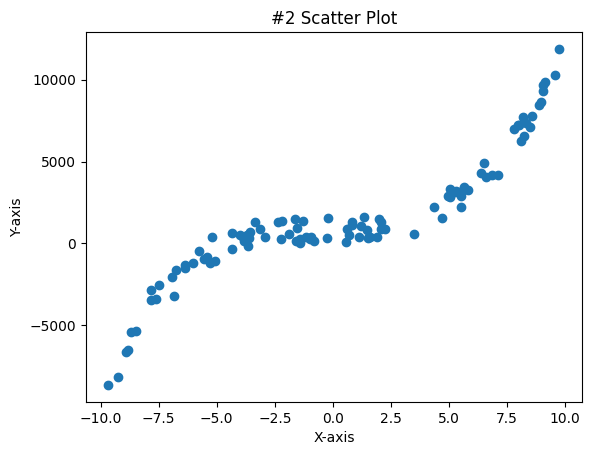

In [10]:
# 2 - Data Preparation: code
url = 'https://raw.githubusercontent.com/j21j/CAP4630/main/HW1/data_nonlinear.csv'
df1 = pd.read_csv(url)

plt.scatter(df1['X'], df1['Y'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('#2 Scatter Plot')
plt.show

## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(25 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544

In [17]:
# 3 - Single Variable Nonlinear Regression: code

# url = 'https://raw.githubusercontent.com/j21j/CAP4630/main/HW1/data_nonlinear.csv'
# df1 = pd.read_csv(url)

# # 3.1. Establish a relationship between Y and X with a cubic function.
# model = np.poly1d(np.polyfit(df1['X'], df1['Y'], 3))
# polylineRange = np.linspace(df1['X'].min(), df1['X'].max(), 10000)

# plt.scatter(df1['X'], df1['Y'])
# plt.plot(polylineRange, model(polylineRange), c='r')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('#3 Singular Variable Nonlinear Regression')
# plt.show()
# print(model)

# 3.2. Compute MSE loss with observation-prediction pairs. (paired with #3.4)


# 3.3 Implement Gradient Descent (GD) to achieve optimal solution with the learning rate of 0.000001 (1e-6) and 10000 (1e4) epochs.
# Building the model (use y = ax^3 + bx^2 + cx + d since it's cubic)
a = 0
b = 0
c = 0
d = 0

L = 0.000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

X = df1.iloc[:, 0]
Y = df1.iloc[:, 1]

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):

    Y_pred = a*X**3 + b*X**2 + c*X + d  # The current predicted value of Y
    mse = np.mean((Y-Y_pred)**2)

    D_a = (-2/n) * sum(X**3 * (Y - Y_pred))  # Derivative wrt a
    D_b = (-2/n) * sum(X**2 * (Y - Y_pred))  # Derivative wrt a
    D_c = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt a
    D_d = (-2/n) * sum(Y - Y_pred)  # Derivative wrt d
    a = a - L * D_a  # Update a
    b = b - L * D_b  # Update b
    c = c - L * D_c  # Update c
    d = d - L * D_d  # Update d

# 3.4 Print out the optimal solution
print(f"\n2. MSE = ", mse)
print(f"\n4. Optimal Solution: ")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"d = {d}")


2. MSE =  587236.1426240157

4. Optimal Solution: 
a = 10.655168698725843
b = 20.970276527941813
c = -1.8103041714197274
d = 7.9893336076278585


## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.



Derive predicion function:
0       17.586861
1    -2525.852088
2      707.932686
3       15.539353
4     2418.489651
         ...     
95   -1321.174419
96      19.213106
97   -1147.677059
98      -0.648177
99    1907.203132
Name: X, Length: 100, dtype: float64



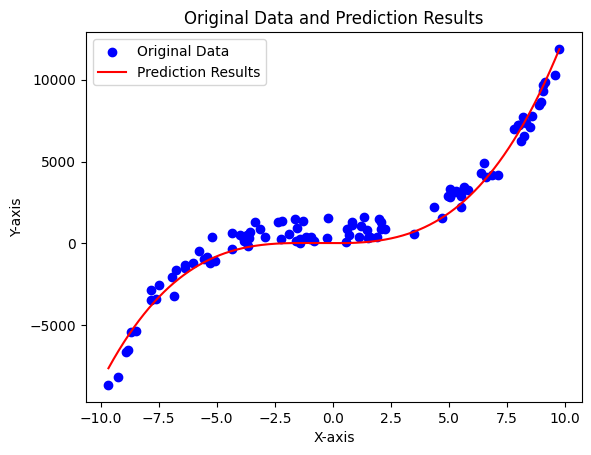

In [18]:
# 4 - Prediction Results: code
# 4.1 Derive prediction function with the obtained coefficients above.
def predict(X, a, b, c, d):
  return a*X**3 + b*X**2 + c*X + d

Y_predict = predict(X, a, b, c, d)
print(f'\nDerive predicion function:\n{Y_predict}')
print()

# 4.2 Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.
# Scatter plot of original data
plt.scatter(X, Y, c='b', label='Original Data')

# Plot cubic polynomial fit
polylineRange = np.linspace(X.min(), X.max(), 10000)
Y_range_pred = predict(polylineRange, a, b, c, d)
plt.plot(polylineRange, Y_range_pred, color='r', label='Prediction Results')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original Data and Prediction Results')
plt.legend()
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


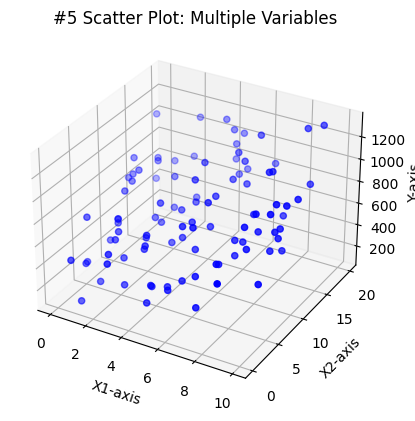

In [20]:
# 5 - Multiple Variables Linear Regression: code
# 5.1 - Data Preparation
url = 'https://raw.githubusercontent.com/j21j/CAP4630/main/HW1/data_two_variables.csv'
df2 = pd.read_csv(url)
df2.head()
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')
ax.scatter(df2['X1'], df2['X2'], df2['Y'], c='b', marker='o')

ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
plt.title('#5 Scatter Plot: Multiple Variables')
plt.show()

## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(25 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [22]:
# 5.1 - Data Preparation
# 5.2.1 find linear function to describethe relationship among Y, X1, and X2.
X1 = df2['X1'].values
X2 = df2['X2'].values
Y = df2['Y'].values

# Use m1X1 + m2X2 + m3
m1 = 0
m2 = 0
m3 = 0

L = 0.001 #learning rate
epochs = 10000 #number of iterations to perform gradient descent

n = float(len(X1)) # number of elements in X

# Performing Gradient Descent
for i in range(epochs):

    Y_pred = m1*X1 + m2*X2 + m3  # The current predicted value of Y

    # compute MSE for 5.2.2
    mse = np.mean((Y-Y_pred)**2)

    D_m1 = (-2/n) * sum(X1 * (Y - Y_pred))  # Derivative wrt a
    D_m2 = (-2/n) * sum(X2 * (Y - Y_pred))  # Derivative wrt a
    D_m3 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt d

    m1 = m1 - L * D_m1 # Update m1
    m2 = m2 - L * D_m2 # Update m2
    m3 = m3 - L * D_m3 # Update m3

# 3.4 Print out the optimal solution
print(f"\n5.2.2. MSE = ", mse)
print(f"\n5.2.4. Optimal Solution: ")
print(f"m1 = {m1}")
print(f"m2 = {m2}")
print(f"m3 = {m3}")


5.2.2. MSE =  20269.83574374662

5.2.4. Optimal Solution: 
m1 = 32.73494342264618
m2 = 34.69592128962032
m3 = 222.91661391579635


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)


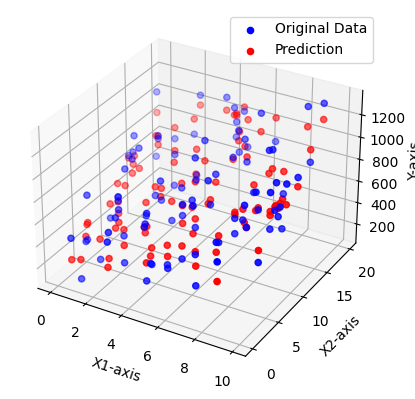

In [26]:
# 5.3.2 Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

# Plot original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='b', marker='o', label='Original Data')

# Plot prediction results
ax.scatter(X1, X2, Y_pred, c='r', marker='o', label='Prediction')

ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
plt.legend()
plt.show()
